In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


In [13]:
# Step 2: Load your transaction scores CSV
df = pd.read_csv("transaction_scores.csv")
df.head()


,transaction_id,model_output
0,TXN100001,Predicted risk for transaction (length 1256): LOW
1,TXN100002,Predicted risk for transaction (length 1271): LOW
2,TXN100003,Predicted risk for transaction (length 1265): LOW
3,TXN100004,Predicted risk for transaction (length 1270): LOW
4,TXN100005,Predicted risk for transaction (length 1248): LOW


In [14]:
# Step 3: Extract only the risk level (LOW, MEDIUM, HIGH) from model_output
df['risk_level'] = df['model_output'].str.extract(r'(LOW|MEDIUM|HIGH)')
df.head()


,transaction_id,model_output,risk_level
0,TXN100001,Predicted risk for transaction (length 1256): LOW,LOW
1,TXN100002,Predicted risk for transaction (length 1271): LOW,LOW
2,TXN100003,Predicted risk for transaction (length 1265): LOW,LOW
3,TXN100004,Predicted risk for transaction (length 1270): LOW,LOW
4,TXN100005,Predicted risk for transaction (length 1248): LOW,LOW


In [15]:
# Step 4: Color-code the risk_level column for portfolio presentation
def color_risk(val):
    if val == "HIGH":
        color = "red"
    elif val == "MEDIUM":
        color = "orange"
    else:
        color = "green"
    return f'background-color: {color}'

display(df.style.applymap(color_risk, subset=['risk_level']))


C:\Users\tyler\AppData\Local\Temp\ipykernel_15036\2953593770.py:11: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  display(df.style.applymap(color_risk, subset=['risk_level']))


,transaction_id,model_output,risk_level
0,TXN100001,Predicted risk for transaction (length 1256): LOW,LOW
1,TXN100002,Predicted risk for transaction (length 1271): LOW,LOW
2,TXN100003,Predicted risk for transaction (length 1265): LOW,LOW
3,TXN100004,Predicted risk for transaction (length 1270): LOW,LOW
4,TXN100005,Predicted risk for transaction (length 1248): LOW,LOW


C:\Users\tyler\AppData\Local\Temp\ipykernel_15036\3801247039.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='risk_level', data=df, order=["LOW","MEDIUM","HIGH"], palette=["green","orange","red"])


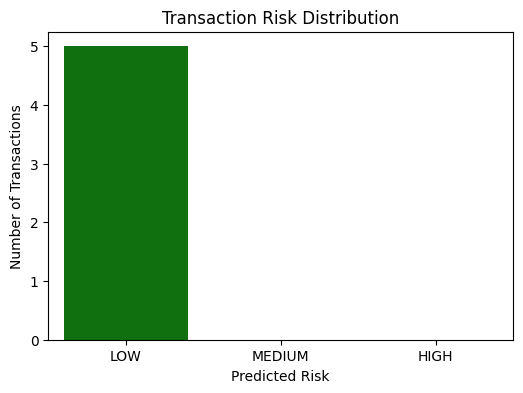

In [16]:
# Step 5: Plot risk level distribution
plt.figure(figsize=(6,4))
sns.countplot(x='risk_level', data=df, order=["LOW","MEDIUM","HIGH"], palette=["green","orange","red"])
plt.title("Transaction Risk Distribution")
plt.xlabel("Predicted Risk")
plt.ylabel("Number of Transactions")
plt.show()


In [17]:
# Step 6: Show only high-risk transactions
high_risk = df[df['risk_level'] == "HIGH"]
display(high_risk)


,transaction_id,model_output,risk_level


In [18]:
# Step 7: Summarize high-risk counts per merchant (if merchant info exists in CSV)
if 'merchant_name' in df.columns:
    high_risk_by_merchant = high_risk['merchant_name'].value_counts().reset_index()
    high_risk_by_merchant.columns = ['Merchant', 'High Risk Count']
    display(high_risk_by_merchant)


# AI Transaction Guardian Portfolio
Demonstration of AI transaction scoring, risk visualization, and analysis.


## Risk Extraction
We extract the predicted risk level (LOW, MEDIUM, HIGH) from the model output to categorize transactions.


C:\Users\tyler\AppData\Local\Temp\ipykernel_15036\2216089907.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='risk_level', data=df, order=["LOW","MEDIUM","HIGH"], palette=["green","orange","red"])


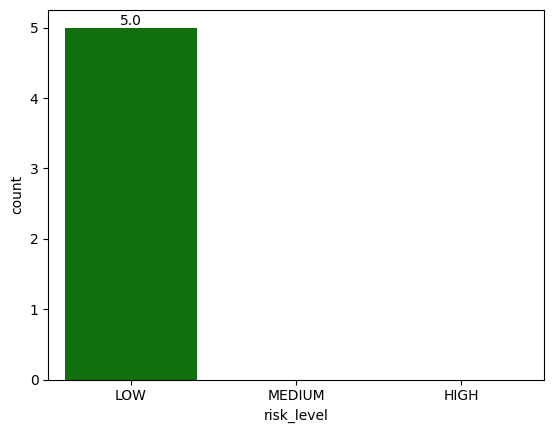

In [20]:
ax = sns.countplot(x='risk_level', data=df, order=["LOW","MEDIUM","HIGH"], palette=["green","orange","red"])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='bottom')
plt.show()
